In [3]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [6]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [8]:
from astropy.table    import Table
from cosmo            import cosmo, fsky
from gama_limits      import gama_field
#from jackknife_limits import jk_field
from findfile         import findfile
import pubplot

In [9]:
survey = 'gama'
version = 'GAMA4'

In [26]:
# TODO: Fix
#fpath = findfile(ftype='ddp_n8', survey=survey, version=version)
#dat = Table.read(fpath)

dat = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits')

KeyError: 'CSCRATCH'

In [5]:
isin = gama_field(dat['RA'], dat['DEC']) == 'G9'
G9 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G12'
G12 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G15'
G15 = dat[isin]

In [6]:
jk_field(G9['RA'], G9['DEC'])

array(['JK1', 'JK0', 'JK0', ..., 'JK2', 'JK0', 'JK2'], dtype='<U4')

In [7]:
jk_field(G12['RA'], G12['DEC'])

array(['JK4', 'JK5', 'JK5', ..., 'JK3', 'JK5', 'JK4'], dtype='<U4')

In [8]:
jk_field(G15['RA'], G15['DEC'])

array(['JK7', 'JK7', 'JK6', ..., 'JK6', 'JK6', 'JK6'], dtype='<U4')

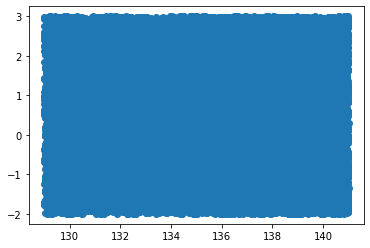

In [9]:
plt.scatter(G9['RA'], G9['DEC'])

In [10]:
isin = jk_field(dat['RA'], dat['DEC']) == 'JK0'
JK0 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK1'
JK1 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK2'
JK2 = dat[isin]

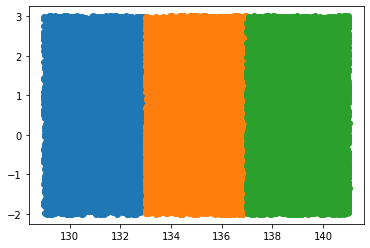

In [11]:
plt.scatter(JK0['RA'], JK0['DEC'])
plt.scatter(JK1['RA'], JK1['DEC'])
plt.scatter(JK2['RA'], JK2['DEC'])

In [27]:
# TODO: Fix
#fpath = findfile(ftype='lumfn', version=version, survey=survey)

fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_lumfn_test.fits'
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_lumfn_test.fits'

In [28]:
lumfn = Table.read(fpath, hdu=1)

In [29]:
# TODO: take from header.
jackknife = 15

/tmp/ipykernel_148291/2848131390.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR']*50)


Text(0.5, 1.0, 'GAMA')

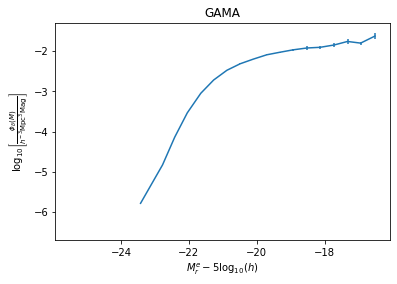

In [48]:
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR'])

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.title(survey.upper())

/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_148291/198963838.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot

(-2.5, -1.5)

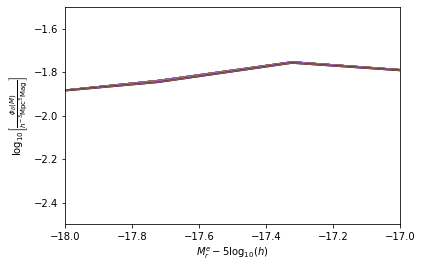

In [40]:
for idx in range(1, jackknife+1):
    lumfn = Table.read(fpath, hdu=idx)
    plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))

plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), color='black')
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR'])

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.xlim(-18, -17)
plt.ylim(-2.5, -1.5)

/tmp/ipykernel_148291/3291711747.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR']*50, label='d{}'.format(utier))
/tmp/ipykernel_148291/3291711747.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR']*50, label='d{}'.format(utier))
/tmp/ipykernel_148291/3291711747.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR']*50, label='d{}'.format(utier))
/tmp/ipykernel_148291/3291711747.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR']*50, label='d{}'.format(utier))


Text(0.5, 1.0, 'GAMA')

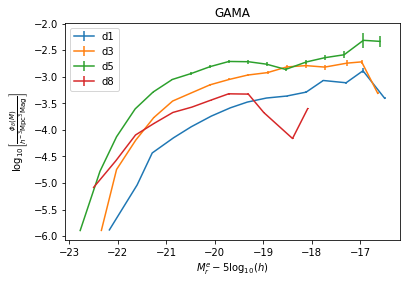

In [53]:
'''
d8 JK work here
'''
# TODO: take from header.
jackknife = 15

for utier in [1, 3, 5, 8]:
    fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn_test2.fits'.format(utier)
    lumfn = Table.read(fpath, hdu=1)


    plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_JK']), yerr=lumfn['PHI_ERR'], label='d{}'.format(utier))

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.legend()
plt.title(survey.upper())